## Visualizando Correlações dos Dados


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 47)
dados = pd.read_csv("/home/gab/MachineLearning-Files/Exercicios/Datasets/building_energy_benchmarking.csv")


In [4]:
dados.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


Remover todas as colunas que não forem do tipo: `float` `int` ou `bolean` do dataset.

In [5]:
Columns_to_remove = ['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Location', 'Neighborhood',
                    'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 
                    'ThirdLargestPropertyUseType', 'DefaultData', 'Comment', 'ComplianceStatus', 
                    'Outlier', '2010 Census Tracts', 'City Council Districts']

for Columns in Columns_to_remove:
    dados.drop(Columns, inplace=True, axis=1)

In [9]:
dados.head()

,OSEBuildingID,DataYear,TaxParcelIdentificationNumber,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Zip Codes
0,1,2015,659000030,7,1927,1,12.0,88434,0,88434,88434.0,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,14.0,31.0,18081
1,2,2015,659000220,7,1996,1,11.0,103566,15064,88502,83880.0,15064.0,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,14.0,31.0,18081
2,3,2015,659000475,7,1969,1,41.0,961990,0,961990,757243.0,100000.0,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,56.0,31.0,18081
3,5,2015,659000640,7,1926,1,10.0,61320,0,61320,61320.0,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,56.0,31.0,18081
4,8,2015,659000970,7,1980,1,18.0,119890,12460,107430,123445.0,68009.0,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,56.0,31.0,19576


### Executando Algoritmo de Correlação


In [11]:
matrix_corr = dados.corr(method = 'pearson')
matrix_corr

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Zip Codes
OSEBuildingID,1.000000,NaN,-0.092519,0.134578,-0.000676,-0.113519,-0.268611,-0.179414,-0.261334,-0.252482,-0.223600,-0.180031,0.074262,-0.148349,-0.135939,-0.175447,-0.164757,-0.233614,-0.227312,-0.068027,-0.267634,-0.267634,-0.094450,-0.094450,-0.059625,-0.142120,-0.039979,-0.033749,-0.005494,0.051580
DataYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CouncilDistrictCode,-0.092519,NaN,1.000000,-0.023185,-0.025065,0.243339,0.143526,0.152531,0.124161,0.116951,0.156437,0.062676,0.066326,0.066411,0.059433,0.078232,0.075340,0.084376,0.082095,0.013071,0.102873,0.102873,0.029263,0.029263,0.036443,0.042012,0.017191,0.087212,-0.185280,-0.062987
YearBuilt,0.134578,NaN,-0.023185,1.000000,-0.004222,0.142683,0.181080,0.248852,0.141241,0.159239,0.197615,0.103654,0.011589,-0.008990,-0.025789,0.057837,0.051472,0.085684,0.081467,0.001868,0.110454,0.110454,0.028143,0.028143,-0.022980,0.035245,-0.159084,0.077662,0.075032,0.037048
NumberofBuildings,-0.000676,NaN,-0.025065,-0.004222,1.000000,-0.017514,0.262966,0.033448,0.294679,0.260629,0.130486,-0.023896,-0.023697,0.027440,0.029103,0.026978,0.027914,0.194295,0.211656,-0.003271,0.167999,0.167999,0.245667,0.245667,-0.001656,0.165773,0.017461,0.009453,-0.008761,0.026347
NumberofFloors,-0.113519,NaN,0.243339,0.142683,-0.017514,1.000000,0.596612,0.445613,0.567785,0.579017,0.502411,0.306378,0.012372,0.015420,0.002801,0.040549,0.032039,0.343528,0.327366,0.096026,0.411062,0.411062,0.107321,0.107321,0.011808,0.191113,-0.033674,-0.118129,-0.105375,-0.129517
PropertyGFATotal,-0.268611,NaN,0.143526,0.181080,0.262966,0.596612,1.000000,0.648706,0.978159,0.954736,0.822816,0.618700,0.056831,0.106480,0.087989,0.127974,0.111642,0.678425,0.662026,0.284826,0.697844,0.697844,0.381319,0.381319,0.062270,0.518440,0.022912,-0.025815,-0.065763,-0.071756
PropertyGFAParking,-0.179414,NaN,0.152531,0.248852,0.033448,0.445613,0.648706,1.000000,0.476348,0.553280,0.551182,0.414223,0.079775,0.086773,0.072167,0.127134,0.117201,0.326776,0.315039,0.012191,0.390832,0.390832,0.165459,0.165459,0.005551,0.166104,-0.056237,-0.002896,-0.086471,-0.070496
PropertyGFABuilding(s),-0.261334,NaN,0.124161,0.141241,0.294679,0.567785,0.978159,0.476348,1.000000,0.951616,0.801731,0.612501,0.044616,0.099318,0.081945,0.113127,0.096971,0.694545,0.678805,0.325735,0.699484,0.699484,0.395353,0.395353,0.070426,0.553595,0.041830,-0.029034,-0.052361,-0.063648
LargestPropertyUseTypeGFA,-0.252482,NaN,0.116951,0.159239,0.260629,0.579017,0.954736,0.553280,0.951616,1.000000,0.776318,0.459681,0.056182,0.084313,0.068482,0.094334,0.079677,0.705917,0.694755,0.346079,0.696225,0.696225,0.426108,0.426107,0.081979,0.583793,0.052804,-0.025979,-0.048277,-0.060120


### Plotando A correlação dos dados


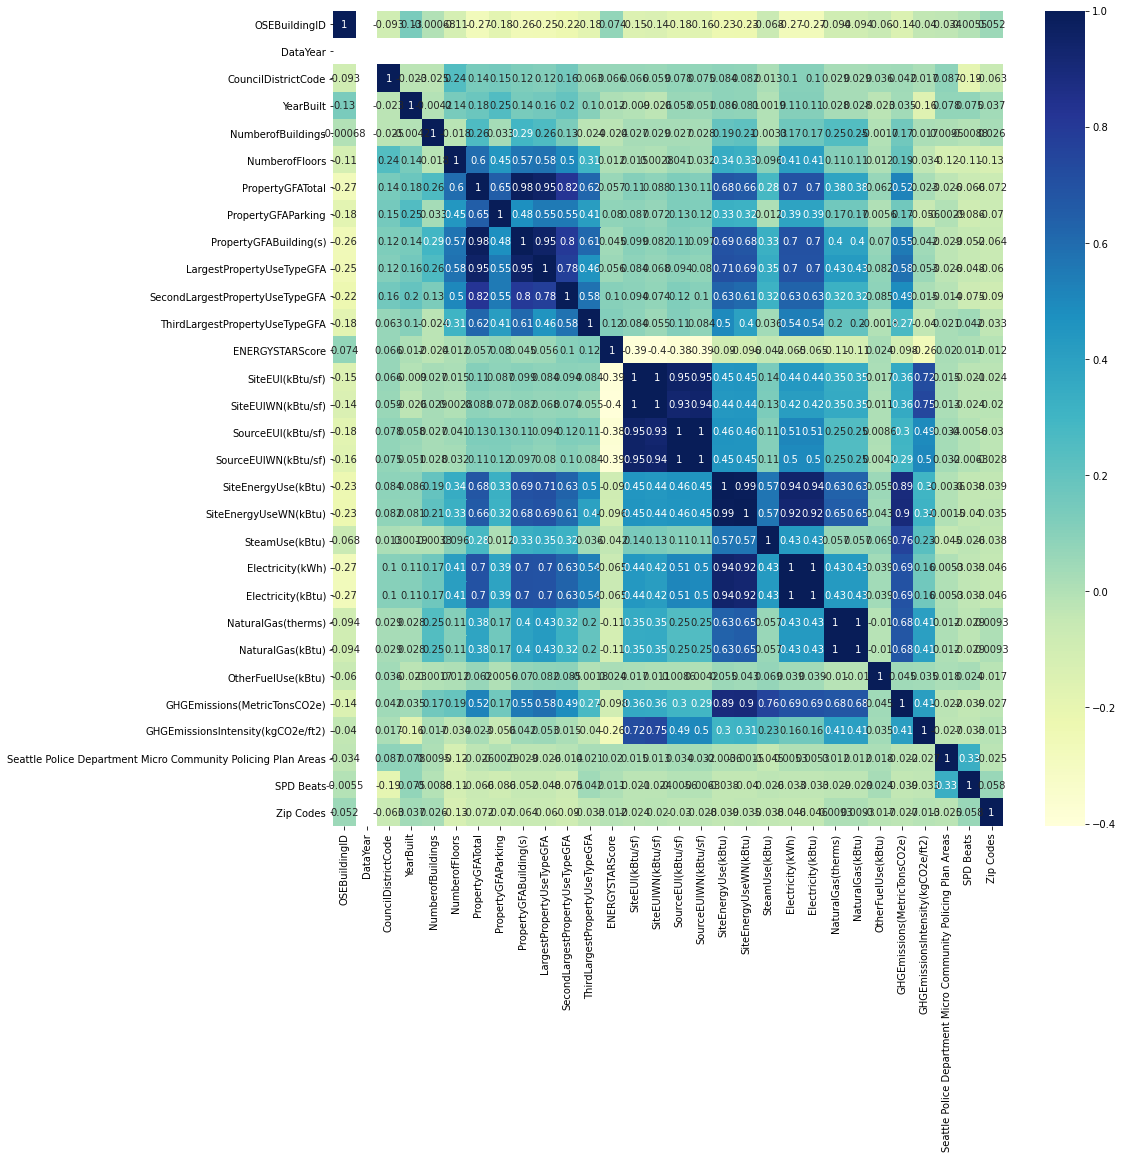

In [26]:
plt.figure(figsize=(15, 15))
sns.heatmap(dados.corr(), annot = True, cmap="YlGnBu")
plt.show()